<a href="https://colab.research.google.com/github/sreekanthTa/BreedPredictionDL/blob/main/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/MyDrive/MachineLearning/dog-breed-identification.zip' -d '/content/drive/MyDrive/MachineLearning/dog-breed-ide'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/MachineLearning/dog-breed-ide/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: /content/drive/MyDrive/MachineLearning/dog-breed-ide/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/drive/MyDrive/MachineLearning/dog-breed-ide/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/drive/MyDrive/MachineLearning/dog-breed-ide/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/drive/MyDrive/MachineLearning/dog-breed-ide/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/drive/MyDrive/MachineLearning/dog-breed-ide/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/drive/MyDrive/MachineLearning/dog-breed-ide/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/drive/MyDrive/MachineLearning/dog-breed-ide/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/drive/MyDrive/MachineLearning/dog-breed

In [ ]:
import tensorflow as tf;
print(tf.__version__)

2.18.0


In [ ]:
import pandas as pd;

labels_data = pd.read_csv('/content/drive/MyDrive/MachineLearning/dog-breed-ide/labels.csv')
labels_data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


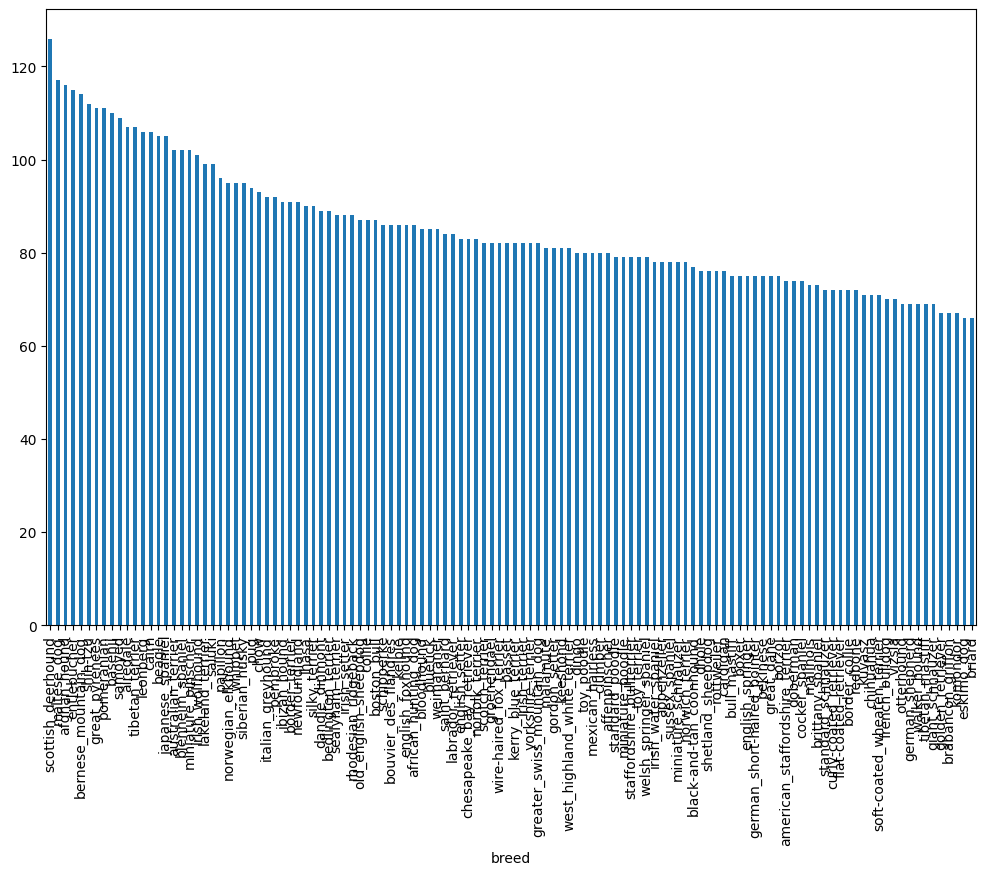

In [ ]:
labels_data["breed"].value_counts().plot.bar(figsize=(12, 8));

In [ ]:
labels_data["breed"].value_counts().median()

82.0

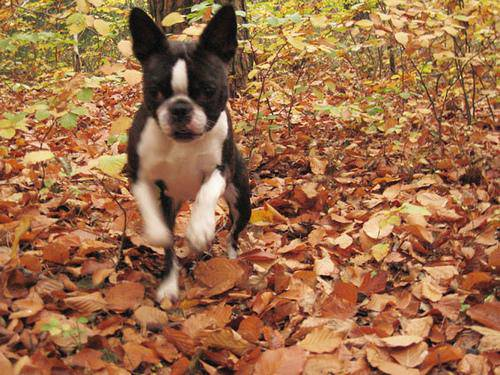

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [ ]:
import os
len(os.listdir('/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/'))

10222

In [ ]:
path = '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/'
filenames = [path + fname +'.jpg' for fname in labels_data["breed"]]

filenames[:10]

['/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/boston_bull.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/dingo.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/pekinese.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/bluetick.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/golden_retriever.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/bedlington_terrier.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/bedlington_terrier.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/borzoi.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/basenji.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/scottish_deerhound.jpg']

In [ ]:
len(filenames)

10222

Hello

In [ ]:
import os
len(os.listdir('/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/'))

10222

In [ ]:
import os
if(len(os.listdir('/content/drive/MyDrive/MachineLearning/dog-breed-ide/train')) == len(filenames)):
  print("length  matched", len(os.listdir('/content/drive/MyDrive/MachineLearning/dog-breed-ide/train')), len(filenames))
else:
  print("length not  matched")

length  matched 10222 10222


In [ ]:
import numpy as np

labels = np.asarray(labels_data["breed"])
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# Unique labels
unique_labels = np.unique(labels)
len(unique_labels)

120

In [ ]:
labels[0] == unique_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222